# Ejercicio 1

In [1]:
%%time
import os
import pandas as pd
import pandas_profiling

from ml_tps.utils.data_processing import get_test_train_X_y, scale_dataset
from ml_tps.algorithms.logistic_regression import LogisticRegression
from ml_tps.utils.evaluation import getConfusionMatrix, computeAccuracy
from ml_tps.algorithms.k_nearest_neighbors import KNN
from ml_tps.algorithms.k_means import KMeans

# For multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Dependencias importadas con éxito.")

Dependencias importadas con éxito.
Wall time: 4.76 s


In [2]:
%%time
dir_path = os.path.dirname(os.path.realpath("e1.ipynb"))
filepath = f"{dir_path}/../tp3/data/acath.xls"
data = pd.read_excel(filepath)

data.profile_report()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
Wall time: 16.6 s


In [3]:
%%time
objective = "sigdz"
train_pctg = 0.6

data = data.drop("tvdlm", axis=1)
data = data.dropna()

data = scale_dataset(data, scaling_type="minmax", objective=objective)
data_incl_sex = data
data = data.drop("sex", axis=1)
X_train, y_train, X_test, y_test = get_test_train_X_y(data, objective, train_pctg)

print("Datos limpiados y procesados.")

Datos limpiados y procesados.
Wall time: 776 ms


## b) Regresión logística

Finished after 500 iterations.
Converged with error (cost) = 348.9365174956499.


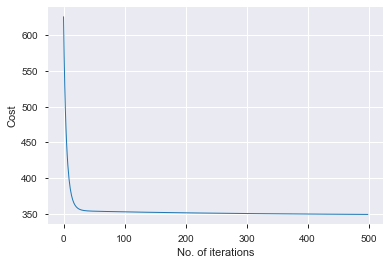



Precisión regresión logística (sin género): 0.6637168141592921

Parámetros regresión logística (sin género):
 0   -0.705151
1    2.004469
2    0.224434
3    0.964668
dtype: float64 


Wall time: 5.15 s


Actual,0.0,1.0
Predicted,,
0,14,1
1,303,586


In [4]:
%%time
logMod = LogisticRegression()
logMod.fit(X=X_train, y=y_train, plot_cost_vs_iterations=True)
predictions = logMod.predict(X_test)
parameters = logMod.theta
accuracy = computeAccuracy(predictions, y_test)
conf_matrix_logMod = getConfusionMatrix(predictions=predictions, actual=y_test)

print("\n\nPrecisión regresión logística (sin género):", accuracy)
print("\nParámetros regresión logística (sin género):\n", logMod.theta, "\n\n")
conf_matrix_logMod

## c) Probabilidad del paciente

In [5]:
%%time
cholesterol = 199
edad = 60
duracion = 2
persona = pd.DataFrame([cholesterol, edad, duracion]).T
probabilidad = logMod.predict(persona, return_as_probabilities=True)[0] * 100

print("Probabilidad (en %):", probabilidad.astype(int), "%")

Probabilidad (en %): 100 %
Wall time: 3.99 ms


## d) Regresión logística (con género)

Finished after 500 iterations.
Converged with error (cost) = 321.44670961608927.


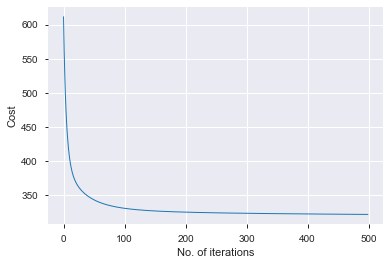



Precisión regresión logística (con género): 0.75

Parámetros regresión logística (con género):
 0   -0.451898
1   -1.807326
2    2.341541
3    0.227311
4    1.282512
dtype: float64 


Wall time: 5.56 s


Actual,0.0,1.0
Predicted,,
0,157,87
1,139,521


In [6]:
%%time
X_train2, y_train2, X_test2, y_test2 = get_test_train_X_y(data_incl_sex, objective, train_pctg)
logMod2 = LogisticRegression()
logMod2.fit(X=X_train2, y=y_train2, plot_cost_vs_iterations=True)
predictions2 = logMod2.predict(X_test2)
parameters2 = logMod2.theta
conf_matrix_logMod2 = getConfusionMatrix(predictions=predictions2, actual=y_test2)
accuracy2 = computeAccuracy(predictions2, y_test2)

pd.DataFrame(logMod2.theta)
print("\n\nPrecisión regresión logística (con género):", accuracy2)
print("\nParámetros regresión logística (con género):\n", logMod2.theta, "\n\n")
conf_matrix_logMod2

## e) KNN

In [ ]:
%%time
X_train_knn, y_train_knn, X_discard, y_discard = get_test_train_X_y(data, objective, train_pctg=0.1)
knn = KNN()
knn.fit(X_train=X_train, y_train=y_train)
predictions_knn = knn.predict(examples=X_test, k=5)
conf_matrix_knn = getConfusionMatrix(predictions_knn, y_test)
accuracy_knn = computeAccuracy(predictions_knn, y_test)

print("Precisión KNN:", accuracy_knn, "\n\n")
conf_matrix_knn

## f) K-medias

In [ ]:
%%time
kmeans = KMeans()
kmeans.fit(X_train, k=2)
predictions_kmeans = kmeans.predict(X_test)
conf_matrix_kmeans = getConfusionMatrix(predictions_kmeans, y_test)
accuracy_kmeans = computeAccuracy(predictions_kmeans, y_test)   # possibly real accuracy is (1 - accuracy_kmeans) (we don't know which cluster is which)

x_axis = "age"
y_axis = "choleste"
kmeans.plot(x_axis, y_axis, X_test)
print("\n\nPrecisión K-medias:", accuracy_kmeans, "\n\n")
conf_matrix_kmeans